# Data Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/bigdatamart_rep/raw/master/bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Through the link - we have pulled the dataset from github.

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We have 12 columns in the dataset and out of 12 we have a 7 columns in object so we will label encoded in upcoming step.

In [4]:
df.shape

(8523, 12)

We have a 8523 rows and 12 columns in the dataset.

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Based on the above info - We have a null value in the dataset. However, we will visualize and see the output through heatmap in the next step

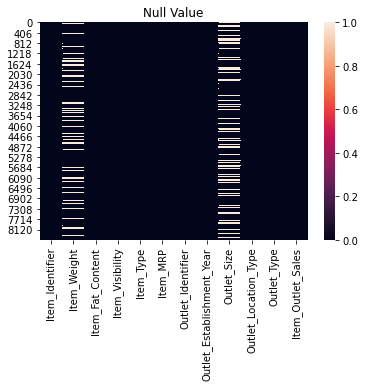

In [6]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

So, We have a null value in the weight & Size columns in the dataset. We will fill the dataset in upcoming step.

# Checking The Data Before Proceeding on Data Cleaning

In [7]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("LF","Low Fat")

In [9]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

From the Column("Item_fat_Content") - We have a same info but not in regular format. Hence, I have changed into standard format.

# Treating the Missing Value

In [10]:
df["Item_Weight"]=df["Item_Weight"].fillna(np.mean(df["Item_Weight"]))
df["Outlet_Size"].fillna("Multi", inplace = True)

We have a null value in the two columns which is Item_Weight & Outlet_Size. Hence we filled the null value based on below justification.

Item_Weight - It is a float type Hence I used "mean" method to fill the null value
Outlet_Size - It is String type on category based. Hence, I used "Multi" to fill the null value because food type are diff size like fruit,cookies etc.

Let check the null  value in the dataset again

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We don't have a nll value in the dataset now

In [12]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
df_Visualization_continuous = df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].copy()

In [14]:
df_Visualization_continuous.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

# Visualization On The Data

Checking the distribution of the continuous value of the float type column

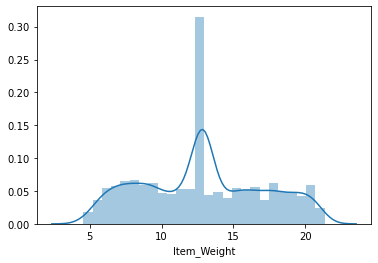

In [15]:
A=sns.distplot(df_Visualization_continuous["Item_Weight"],kde=True)

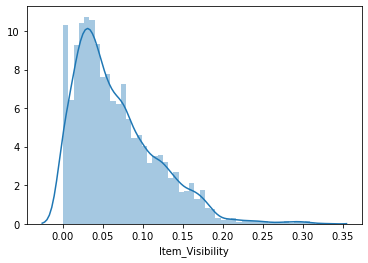

In [16]:
B=sns.distplot(df_Visualization_continuous["Item_Visibility"],kde=True)

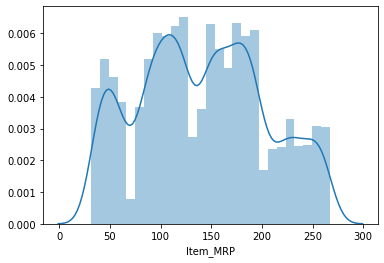

In [17]:
C=sns.distplot(df_Visualization_continuous["Item_MRP"],kde=True)

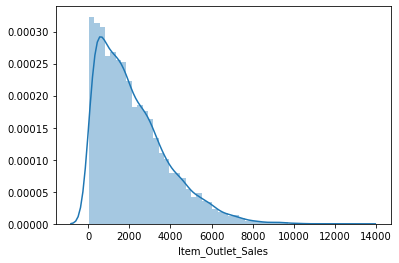

In [18]:
D=sns.distplot(df_Visualization_continuous["Item_Outlet_Sales"],kde=True)

Since we can see - there is 7 columns with sting value so we will encodying in next step

# Encoding Method of DataFrame

In [19]:
from sklearn.preprocessing import OrdinalEncoder

OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,2.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


We have done the encoded in the dataset. We can use this for further step

# Describe Dataset

In [20]:
#Statistical Summary
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.733779,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.987183,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


We have a outlier and skewness. So we will check in further step

# Correlation

In [21]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001723,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.010260,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001925,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.093951,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.002390,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.005058,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.341612,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.268715,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001723,-0.010260,-0.001925,0.093951,-0.002390,0.005058,0.341612,0.268715,1.000000,-0.584844,-0.428246,-0.157386
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.584844,1.000000,0.467219,0.089367


Correlation using heatmap

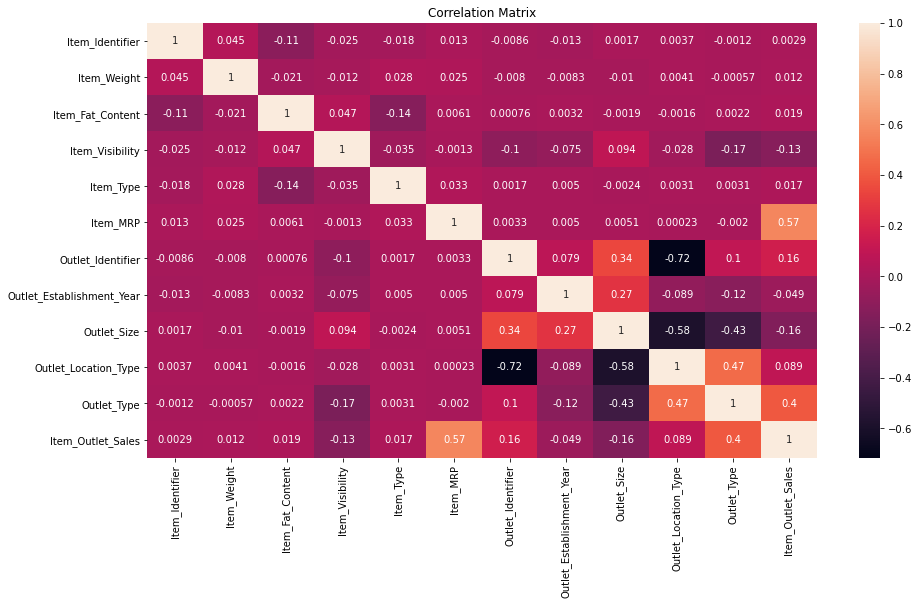

In [22]:
corr_mat=df.corr()

plt.figure(figsize=[15,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we can leave the "Encoded" column only because that is not a data.

Also, we have a highly positive sign with MRP(57%) and second with Type(40%).
Visiblity is having a negative correlation with target column(13%).

# Outlier Checking 

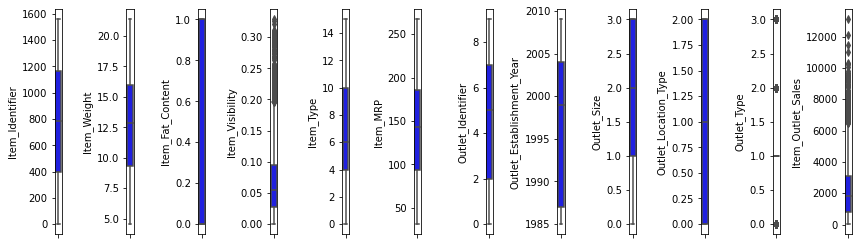

In [23]:
collist=df.columns.values
ncol=25
nrow=15
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have an outlier in two columns(Item_Visiblity & Outlet_Type) which is not near with whisker so
we will rectify in further step

# Checking Skewness

In [24]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.130218
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

From the above info - we can see the skewness in the dataset only on visiblity & Outlet_Type.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(8523, 12)

In [26]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [27]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8523, 12)
(8338, 12)


In [28]:
Loss_percentage=(8523-8338)/8523*100
print(Loss_percentage)

2.170597207556025


We have a 2.1% data loss in the dataset. Hence, We can proceed with this dataset

In [49]:
X=df.drop(["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier"],axis=1)
Y=df["Item_Outlet_Sales"]

In [50]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

I have removed the target from dataset which is "Item_Outlet_Sales".

Also, removed the columns from the dataset which is "Item_Identifier" & "Outlet_Identifier" because this is just an ID only. So, It will affect the model Accuracy.

# Data Transform for Remove Skewness

In [51]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[-0.82263635, -0.73814723, -1.14688621, ..., -0.73850837,
        -1.37384276, -0.12348771],
       [-1.73380133,  1.35474328, -1.03709991, ..., -0.73850837,
         1.08832445,  1.04059102],
       [ 1.08636176, -0.73814723, -1.12237453, ..., -0.73850837,
        -1.37384276, -0.12348771],
       ...,
       [-0.49655592, -0.73814723, -0.54297932, ...,  1.27710279,
        -0.13111325, -0.12348771],
       [-1.37344321,  1.35474328,  1.45998957, ..., -0.73850837,
         1.08832445,  1.04059102],
       [ 0.49178563, -0.73814723, -0.27619496, ...,  1.27710279,
        -1.37384276, -0.12348771]])

In [52]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[-0.82263635, -0.73814723, -1.14688621, ..., -0.73850837,
        -1.37384276, -0.12348771],
       [-1.73380133,  1.35474328, -1.03709991, ..., -0.73850837,
         1.08832445,  1.04059102],
       [ 1.08636176, -0.73814723, -1.12237453, ..., -0.73850837,
        -1.37384276, -0.12348771],
       ...,
       [-0.49655592, -0.73814723, -0.54297932, ...,  1.27710279,
        -0.13111325, -0.12348771],
       [-1.37344321,  1.35474328,  1.45998957, ..., -0.73850837,
         1.08832445,  1.04059102],
       [ 0.49178563, -0.73814723, -0.27619496, ...,  1.27710279,
        -1.37384276, -0.12348771]])

# Finding the best Random State for Linear Reqression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.33,random_state=i)
    LR =LinearRegression()
    LR.fit(x_train,Y_train)
    pred=LR.predict(x_train)
    predrf=LR.predict(x_test)
    R2 = r2_score(Y_test, predrf)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 54.58842278609559 on Random state 247


We have a best accuracy is 55% and Random State is 247. We can use this random state for train_test split.

# Creating Train-Test Split

In [55]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.33,random_state=247)

# Cross-Validation of the Model

In [56]:
RX = r2_score(Y_train, pred)
RY = r2_score(Y_test, predrf)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(LR,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"Cross Validation Score of {j} is :",cv_mean*100)

Cross Validation Score of 2 is : 51.925324035789934
Cross Validation Score of 3 is : 51.92101021538552
Cross Validation Score of 4 is : 51.80370716087648
Cross Validation Score of 5 is : 51.895655575346744
Cross Validation Score of 6 is : 51.8663281954981
Cross Validation Score of 7 is : 51.93109473226144
Cross Validation Score of 8 is : 51.86367529653588
Cross Validation Score of 9 is : 51.87863822193752


Based on the above CV score there is no much impact on CV score. Hence I am choosing the cv=5

Here, we have facing the over fitting and underfitting problem by checking the training and testing score

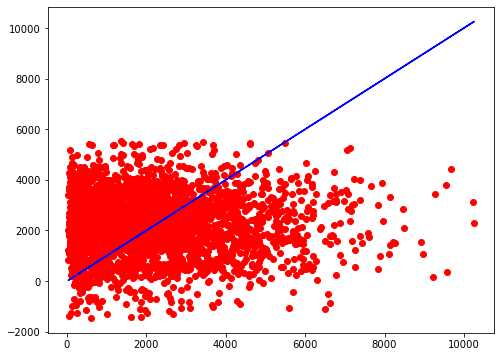

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=predrf,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.show()

Best fit line is touching the most of the dot. So, we can consider best fit of our model.

# Regularization

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [59]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
LS=Lasso()
clf=GridSearchCV(LS,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


We got an best parameter for alpha as 1 and random state is 0. So, we will use this in next step

In [60]:
LS=Lasso(alpha=1,random_state=0)
LS.fit(x_train,Y_train)
LS.score(x_train,Y_train)
predict=LS.predict(x_test)
ls=r2_score(Y_test,predict)
print("Lasso Score :",ls*100)

cv_score=cross_val_score(LS,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Lasso Score : 54.59227532190728
CV Score : 51.900312885671305


# Ensemble Technique:

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
RF=RandomForestRegressor()
clf=GridSearchCV(RF,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [62]:
RF=RandomForestRegressor(criterion="mae",max_features="auto")
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=RF.predict(x_test)
RFS=r2_score(Y_test,pred)
print("R2 Score :",RFS*100)

rfs=cross_val_score(RF,x,Y,cv=5)
rfc=rfs.mean()
print("CV Score :",rfc*100)

R2 Score : 57.13292888547403
CV Score : 55.759030895007044


We are getting model accuracy and cross validation both having diff(1%). which show as model is performing well.

# Model Saving

In [63]:
import joblib
filename='Bigmart_model.obj'
joblib.dump(RF,open(filename,'wb'))

# Using the Testing Data

In [64]:
Test=pd.read_csv("https://github.com/dsrscientist/bigdatamart_rep/raw/master/bigdatamart_Test.csv")
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
Test.shape

(5681, 11)

In [66]:
Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [67]:
Test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [68]:
Test["Item_Fat_Content"]=Test["Item_Fat_Content"].replace("reg","Regular")
Test["Item_Fat_Content"]=Test["Item_Fat_Content"].replace("low fat","Low Fat")
Test["Item_Fat_Content"]=Test["Item_Fat_Content"].replace("LF","Low Fat")

In [69]:
Test["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [70]:
Test["Item_Weight"]=Test["Item_Weight"].fillna(np.mean(Test["Item_Weight"]))
Test["Outlet_Size"].fillna("Multi", inplace = True)

In [71]:
OE=OrdinalEncoder()
for i in Test.columns:
    if Test[i].dtypes=="object":
        Test[i]=OE.fit_transform(Test[i].values.reshape(-1,1))
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007,2.0,1.0,1.0
2,1406.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998,2.0,2.0,0.0
3,809.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007,2.0,1.0,1.0
4,1184.0,12.695633,1.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0


In [72]:
z=np.abs(zscore(Test))
z.shape
threshold=3
print(np.where(z>3))
Test_new=Test[(z<3).all(axis=1)]
print(Test.shape)
print(Test_new.shape)

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))
(5681, 11)
(5600, 11)


Test Data Contain the null value and outlier. Hence, We removed the outlier and standardized the data as per model

In [74]:
Test_df=Test_new.drop(["Item_Identifier","Outlet_Identifier"],axis=1)

# Loading Model for Prediction

In [75]:
Loaded_load = joblib.load(open('Bigmart_model.obj','rb'))

In [76]:
Conclusion=pd.DataFrame([Loaded_load.predict(Test_df)],index=["Predicted"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
Predicted,4613.621152,4705.794504,4630.20623,4645.726028,5012.87478,4660.686554,5005.757378,4891.872288,4670.866636,4619.600036,...,4643.42236,4648.88192,5006.28336,4592.901456,4663.86242,4684.83512,5012.768252,4671.938574,4716.939996,4670.866636


We have a the outcome for this model